In [55]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img, img_to_array
from sklearn.utils import shuffle

In [56]:
def plot_images(images, title, n_rows=10, n_cols=10):
    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
    plt.suptitle(title, fontsize=16)
    for i, image in enumerate(images[:n_rows * n_cols]):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_latent_space(compressed_data, labels):
    plt.figure(figsize=(8, 8))
    plt.scatter(compressed_data[:, 0], compressed_data[:, 1], c=labels, cmap='viridis', s=2)
    plt.colorbar()
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title('Latent Space Visualization')
    plt.show()

In [57]:
data_dir = '../../data'

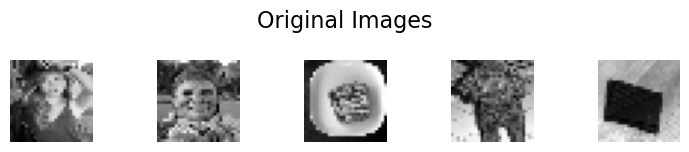

In [58]:
def load_image_data(data_dir, img_size=(28, 28)):
    labels = ['portrait', 'other']
    data = []
    label_data = []
    for label in labels:
        folder_path = os.path.join(data_dir, label)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=img_size, color_mode='grayscale')
            img_array = img_to_array(img).astype('float32') / 255.0
            data.append(img_array.flatten())
            label_data.append(labels.index(label))
    data, label_data = shuffle(np.array(data), np.array(label_data))
    return data, label_data

data, label_data = load_image_data(data_dir)
plot_images(data, title='Original Images', n_rows=1, n_cols=5)


In [65]:
def create_autoencoder(input_dim, encoding_dim, activation_func, loss_func):
    # Encodeur
    encoder = Sequential([
        Dense(128, activation=activation_func, input_shape=(input_dim,)),
        Dense(64, activation=activation_func),
        Dense(encoding_dim, activation=activation_func)
    ])
    
    # Decodeur
    decoder = Sequential([
        Dense(64, activation=activation_func, input_shape=(encoding_dim,)),
        Dense(128, activation=activation_func),
        Dense(input_dim, activation='sigmoid')
    ])

    autoencoder = Sequential([encoder, decoder], name='autoencoder')

    autoencoder.compile(optimizer='adam', loss=loss_func)

    return autoencoder, encoder, decoder

def train_autoencoder(data, encoding_dim, epochs=500, batch_size=256):
    input_dim = data.shape[1]
    autoencoder, encoder, decoder = create_autoencoder(input_dim, encoding_dim, activation_func='tanh', loss_func='binary_crossentropy')
    autoencoder.fit(data, data, epochs=epochs, batch_size=batch_size, shuffle=True)
    return encoder, decoder, autoencoder

In [66]:
encoder, decoder, autoencoder = train_autoencoder(data, encoding_dim=32)

Epoch 1/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.6517
Epoch 2/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6085
Epoch 3/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6030
Epoch 4/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5996
Epoch 5/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5968
Epoch 6/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5952
Epoch 7/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5935
Epoch 8/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5931
Epoch 9/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5917
Epoch 10/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5911
Epoch 11/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5906
Epoch 12/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5900
Epoch 13/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5895
Epoch 14/500
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5892
Epoch 15/500
173/173 ━━━━━━━━

1382/1382 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


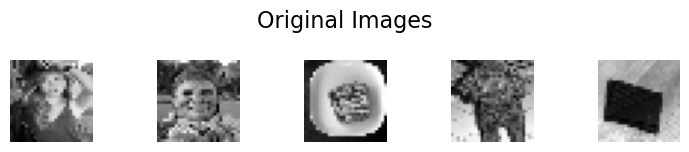

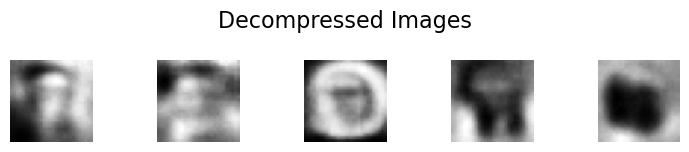

In [67]:
# On utilise les fonctions encodeurs et decodeurs pour compresser et décompresser
def compress(data, encoder):
    return encoder.predict(data)

def decompress(compressed_data, decoder):
    return decoder.predict(compressed_data)

compressed_data = compress(data, encoder)
decompressed_data = decompress(compressed_data, decoder)

plot_images(data, title='Original Images', n_rows=1, n_cols=5)
plot_images(decompressed_data, title='Decompressed Images', n_rows=1, n_cols=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


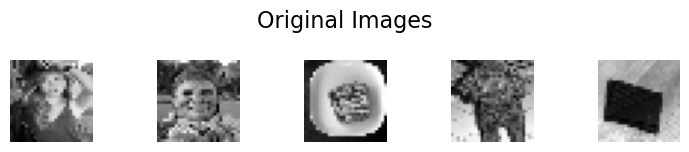

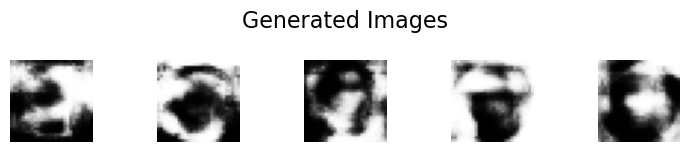

In [68]:
# Recherche d'un vecteur latent aléatoire et utilisation du décodeur
def generate_new_images(decoder, encoding_dim, n_images=10, noise_level=1.0):
    new_images = []
    for _ in range(n_images):
        random_encoded = np.random.normal(scale=noise_level, size=(1, encoding_dim))
        new_image = decoder.predict(random_encoded)
        new_images.append(new_image.reshape(28, 28))
    return np.array(new_images)

generated_images = generate_new_images(decoder, 32)

plot_images(data, title='Original Images', n_rows=1, n_cols=5)
plot_images(generated_images, title='Generated Images', n_rows=1, n_cols=5)

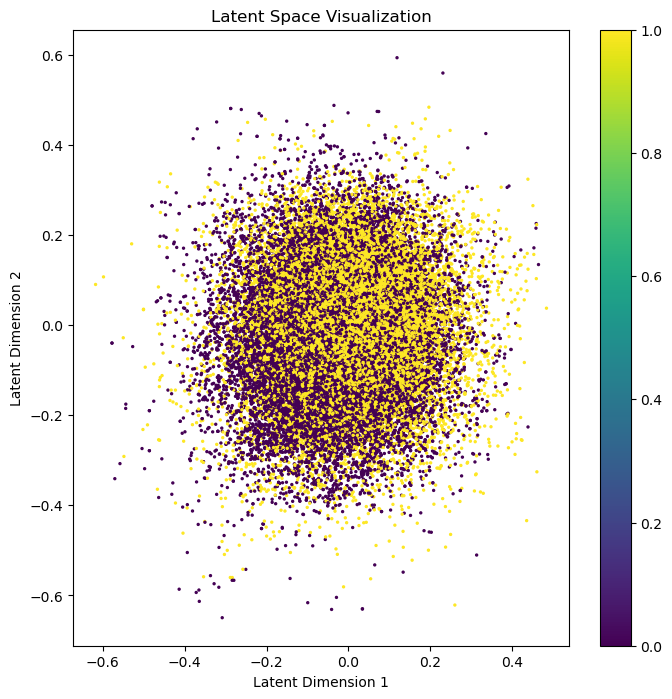

In [69]:
plot_latent_space(compressed_data, label_data)